In [14]:
# Importes necessarios
import pandas
import statistics as st
import seaborn as srn

In [2]:
# Criar um dataset do arquivo .csv
data_base = pandas.read_csv("../dados/tempo.csv", sep=";")
# Analisar as primeiras linhas do dataset
data_base.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
# Ver o tamanho (Linhas x Colunas) do dataset
data_base.shape

(14, 5)

In [4]:
# Analise exploratória
# Dados Categóricos
# Agrupar os valores da coluna de "Aparencia"
# Qualquer valor fora de (chuva, nublado e sol) deve ser mudado
agrupamento = data_base.groupby(['Aparencia']).size()
agrupamento

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

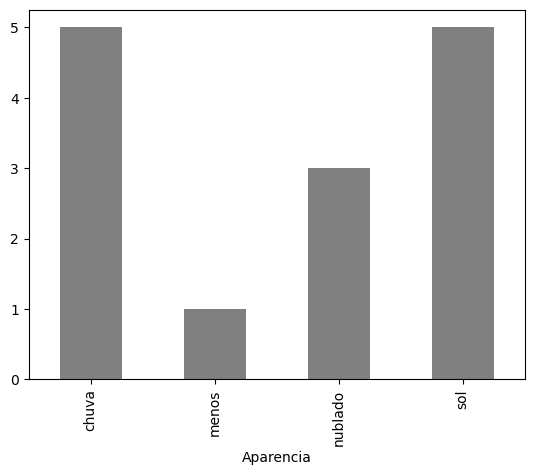

In [5]:
# Analisar o agrupamento de "Aparencia" por meio de grafico de barras
agrupamento.plot.bar(color = 'grey')

In [6]:
# Dados Categóricos
agrupamento = data_base.groupby(['Vento']).size()
agrupamento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

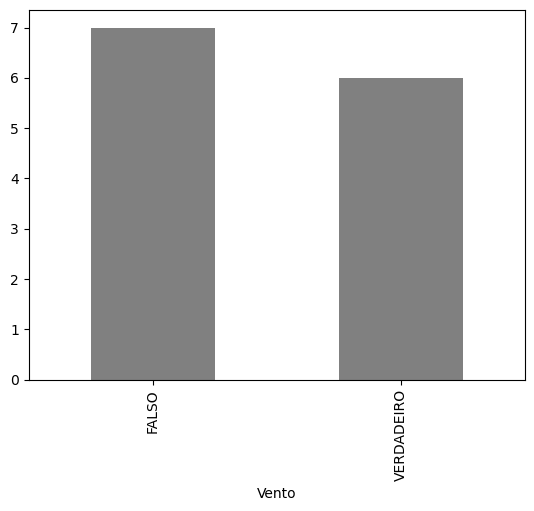

In [8]:
agrupamento.plot.bar(color='grey')

In [10]:
# Dados Categóricos
agrupamento = data_base.groupby(['Jogar']).size()
agrupamento

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

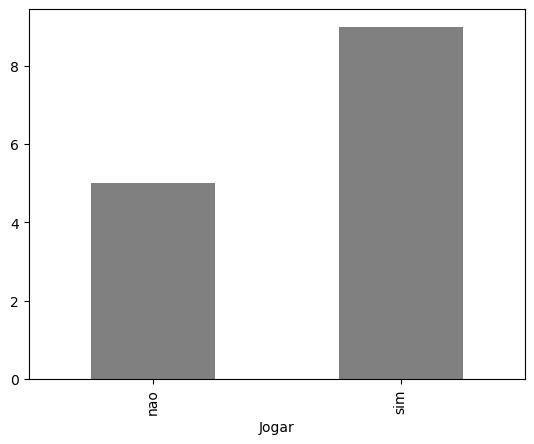

In [11]:
agrupamento.plot.bar(color='grey')

In [12]:
# Dados numéricos
# Ver a descrição dos dados numéricos
data_base['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

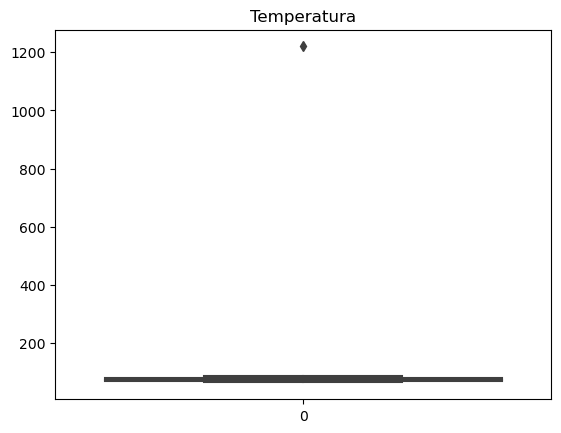

In [15]:
# Ver o boxplot dos dados numéricos
srn.boxplot(data_base['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

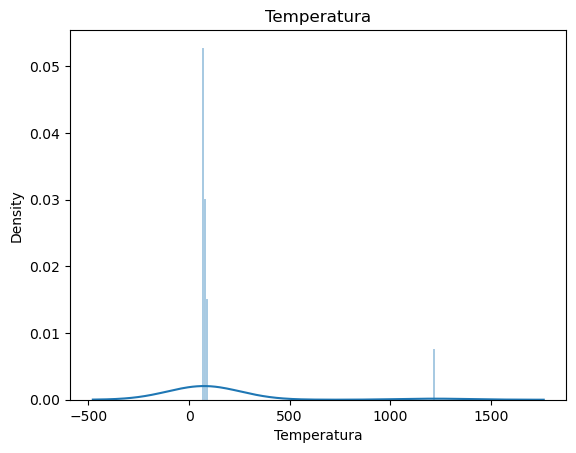

In [16]:
# Ver o historiograma dos dados numéricos
srn.histplot(data_base['Temperatura'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4)).set_title('Temperatura')

In [18]:
data_base['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

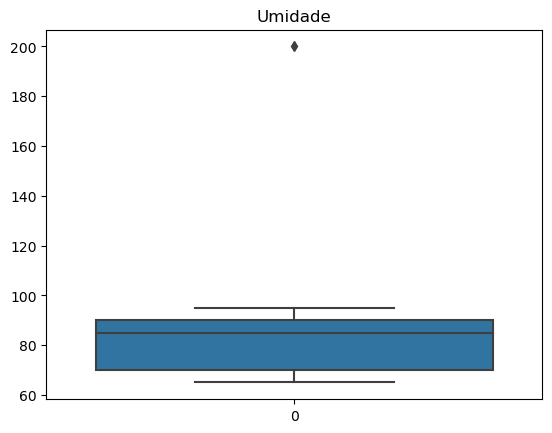

In [19]:
srn.boxplot(data_base['Umidade']).set_title("Umidade")

Text(0.5, 1.0, 'Umidade')

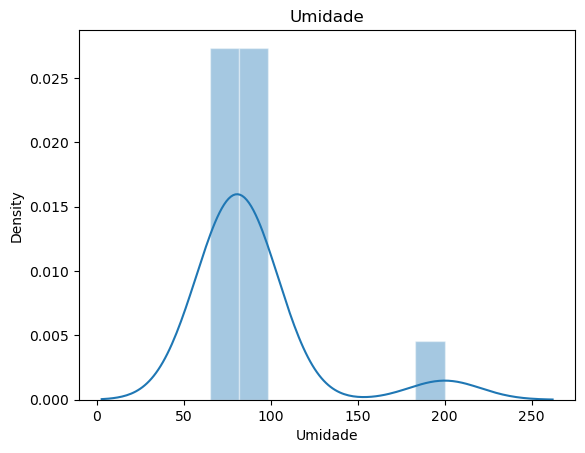

In [20]:
srn.histplot(data_base['Umidade'], kde=True, stat='density', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4)).set_title('Umidade')

In [21]:
data_base.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [25]:
data_base.loc[data_base['Aparencia'] == 'menos', 'Aparencia'] = 'chuva'
data_base.groupby(['Aparencia']).size()

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [45]:
# Tratamento dos dados
# Vento
data_base['Vento'].fillna('False', inplace=True)
data_base['Vento'].isnull().sum()


0

In [47]:
# Fui burro e inves de FALSO coloquei False
data_base.loc[data_base['Vento'] == 'False', 'Vento'] = 'FALSO'
data_base.groupby(['Vento']).size()

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [26]:
mediana = st.median(data_base['Temperatura'])
mediana

73.5

In [28]:
data_base.loc[(data_base['Temperatura'] > 130) | (data_base['Temperatura'] < -130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [30]:
data_base.loc[(data_base['Temperatura'] > 130) | (data_base['Temperatura'] < -130), 'Temperatura'] = mediana
data_base.loc[(data_base['Temperatura'] > 130) | (data_base['Temperatura'] < -130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [31]:
mediana = st.median(data_base['Umidade'])
mediana

85.5

In [32]:
data_base['Umidade'].fillna(mediana, inplace=True)
data_base['Umidade'].isnull().sum()

0

In [33]:
data_base.loc[(data_base['Umidade'] > 100) | (data_base['Umidade'] < 0)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,False,sim


In [34]:
data_base.loc[(data_base['Umidade'] > 100) | (data_base['Umidade'] < 0), 'Umidade'] = mediana
data_base.loc[(data_base['Umidade'] > 100) | (data_base['Umidade'] < 0)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [35]:
data_base.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64